In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42)

In [ ]:
X.shape

(1000, 2)

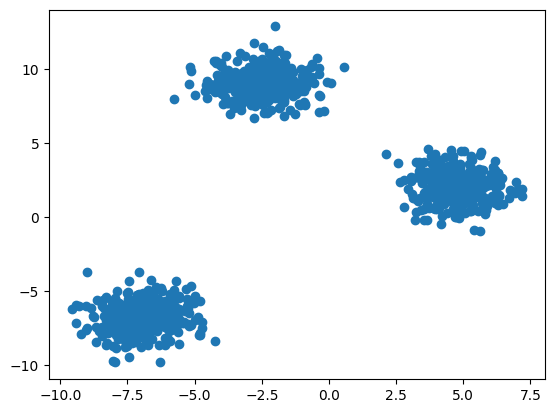

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++")
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

#### Manual Processing to find Number of Clusters

In [ ]:
wcss

[49670.93926058024,
 14338.002336269441,
 1491.468736161074,
 1324.7085109232164,
 1150.5314249176113,
 1060.0749416374967,
 870.6889657084519,
 828.7611662264447,
 719.304637938608,
 615.9496010607189]

Text(0, 0.5, 'WCSS')

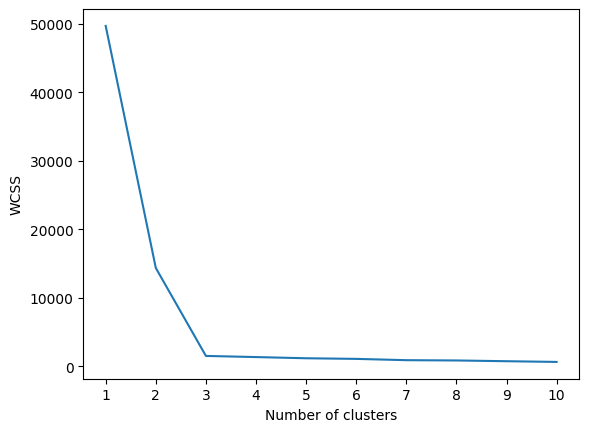

In [ ]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [ ]:
y_labels=kmeans.fit_predict(X_train)

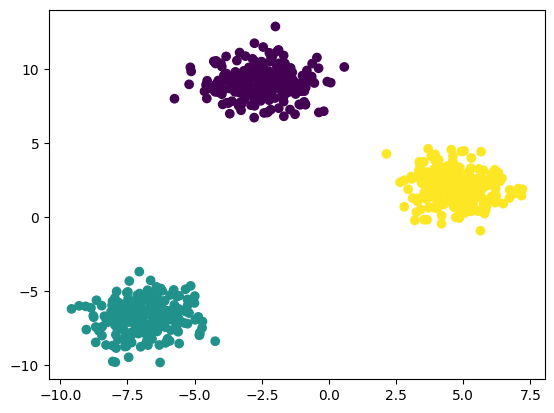

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [ ]:
y_test_labels=kmeans.predict(X_test)

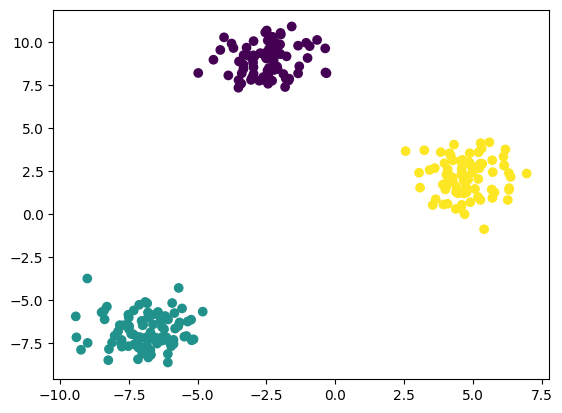

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

#### Automated Process to find number of clusters

For this we need a library called kneed

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

##### So the best n_clusters value is 3.


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sil=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train)
  score=silhouette_score(X_train,kmeans.labels_)
  sil.append(score)


In [ ]:
sil

[np.float64(0.7015587783702529),
 np.float64(0.8417883929960392),
 np.float64(0.653585231845888),
 np.float64(0.48949491760572544),
 np.float64(0.31110307235748647),
 np.float64(0.31840108553099494),
 np.float64(0.3252342130553899),
 np.float64(0.33215629023069587),
 np.float64(0.32519491089806496)]

([<matplotlib.axis.XTick at 0x7d27bf9a8aa0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

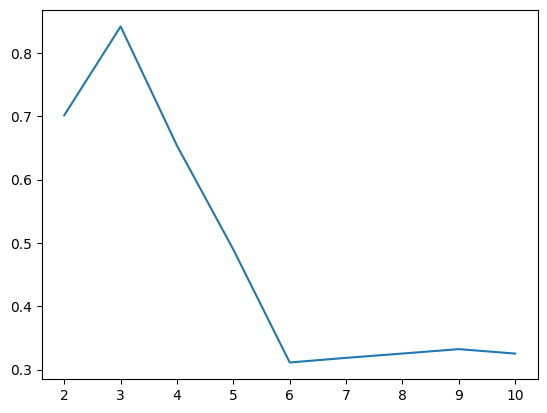

In [ ]:
plt.plot(range(2,11),sil)
plt.xticks(range(2,11))

##### The value of silhoutte scoring is near to one the more better it is here in grapg clearly we can see that the value when k=3 the silhoutte scoring is about 0.84 to 0.85.Therefore in this way u can also calculte the number of clusters.

###***K-Means***

K-means is a clustering algorithm. It divides the data into K clusters where each cluster has points which are close to each other and far from other clusters.

#### Hyperparameters:

The hyperparameters are:

1.K (number of clusters, user has to select it)

2.Initialization of centroids (random or K-means++ way)

3.Number of iterations / tolerance (when to stop)

#### Steps of K-means:

1.First we start by initializing K centroids. These centroids can be chosen randomly from the dataset, or sometimes using better ways like K-means++.

2.For each data point, calculate the distance of that point from all centroids.

3.Assign the point to the cluster of the nearest centroid.

4.After assigning all the points, we recompute the centroid of each cluster.

5.This is done by taking the mean of all points inside the cluster.

6.the new centroid is just the average location of points in that cluster.

7.Repeat the above two steps (assignment + recompute centroid).

8.This continues until either:

The centroids don’t move much anymore (very small change), or

A fixed number of iterations is completed.

#### How to select K:

To find the right value of K, we can use WCSS (Within Cluster Sum of Squares).

WCSS means the sum of squared distances of points from their cluster centroid.

For K = 1, we put all points in one cluster, so WCSS is very high.
As we increase K, the WCSS decreases because clusters are becoming smaller and tighter.If we plot a graph between K vs WCSS, we will notice that at first WCSS drops sharply but after some point, it decreases very slowly.

This point where the curve bends like an “elbow” is the good value for K.This method is called the Elbow Method.In above graph of WCSS vs K the value of k selected is 3 because the graph line become almost constant.

#### About K-means++:

In normal K-means, if we choose bad random initial centroids, algorithm can give bad results (May be all centroids can be initialized close together etc).To avoid this, we use K-means++. It selects the initial centroids in such a way that they are far from each other.

Because of this, we avoid the random initialization trap and get more stable clusters.